# Mathematical Morphology

In [1]:
from myst_nb import glue
import numpy as np
import skimage as ski
import skimage.io as io
import matplotlib.pyplot as plt
import skimage.morphology as mo
import scipy.ndimage.morphology as smo

Mathematical morphology gathers several techniques that apply to binary images, such as the ones resulting for thresholding.
The pixels in binary images take only two values: 0 or 1, true or false, white or black, etc.
There are extensions of these techniques to grayscale images, but this is beyond the scope of the course.
In this chapter, we consider that the images contain objects (represented by white pixels) on a background (black pixels).
We also consider that a binary image is equivalent to a set of pixels, the latter being the set of white pixels of the image.

```{figure} figs/mickey.png
---
name: mm-mickey
---
Example of a binary image composed of on object (a famous mouse head) on a background.
```

Before going further, it is necessary to recall the elementary operations that can be done on sets.
Consider $A$ and $B$ as two sets.
Then:
* The complement of $A$ is denoted $A^\mathrm{c}$ and is the set of pixels which are not in $A$:
  $A^\mathrm{c} = \{p \notin A \} $
* The union $A \cup B $ of the two sets $A$ and $B$ is the set of pixels present in $A$ or $B$ or both:
  $A \cup B = \{p \in A \, \mathrm{or} \, p \in B \} $
* The intersection $A \cap B $ is the set of pixels present simultaneously in $A$ and in $B$:
  $A \cap B = \{p \in A \, \mathrm{and} \, p \in B \} $
  
```{glue:figure} G:mm:set-operations
:name: "F:mm:set-operations"

Illustration of operations on sets.
```

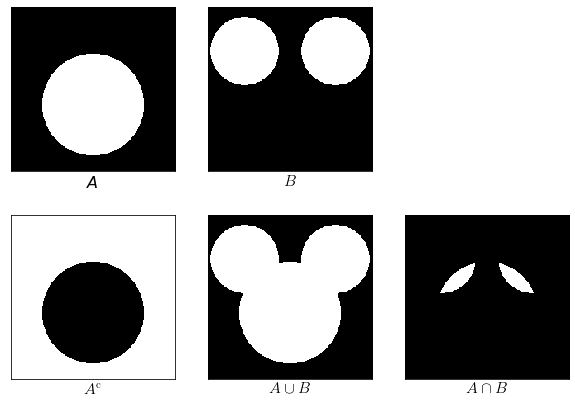

In [2]:
A = io.imread("figs/A.png")
B = io.imread("figs/B.png")
C = np.invert(A)
U = np.bitwise_or(A,B)
I = np.bitwise_and(A,B)

io.imsave("figs/mickey.png", U)

def myplot(no, img, title):
    plt.subplot(2,3,no)
    plt.imshow(img, "gray")
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.xlabel(title, size=16)
    plt.xticks([])
    plt.yticks([])

fig = plt.figure(figsize=(10,7))
myplot(1, A, "$A$")
myplot(2, B, "$B$")
myplot(4, C, "$A^\mathrm{c}$")
myplot(5, U, "$A\cup B$")
myplot(6, I, "$A\cap B$")
plt.show()
glue("G:mm:set-operations", fig, display=False)

In addition to this, the operators of mathematical morphology need a so-called _structuring element_.
A structuring element $E$ is a set of pixels (so equivalent to a binary image) associated with an origin.
Generally, the origin is located at the centre of the structuring element.
but it may be elsewhere, even outside the pixels of the structuring element.
In the sequel, we denote by $E_x$ the structuring element centred on the pixel $x$.

## Basic operators

In [3]:
def display(img, title, grid=True):
    plt.imshow(img, "gray")
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.xlabel(title, size=16)
    plt.xticks([])
    plt.yticks([])
    if grid:
        ax = plt.gca();
        M, N = img.shape
        ax.set_xticks(np.arange(.50, N-1), minor=True)
        ax.set_yticks(np.arange(.45, M-1), minor=True)
        ax.grid(which='minor', color='#cccccc')

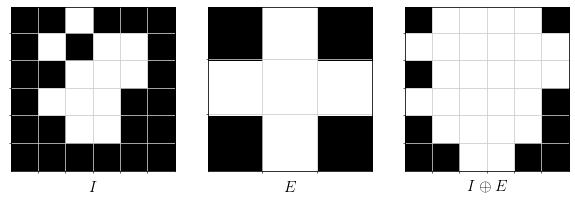

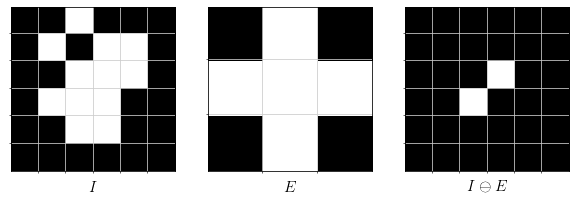

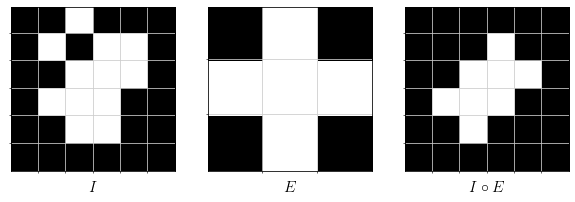

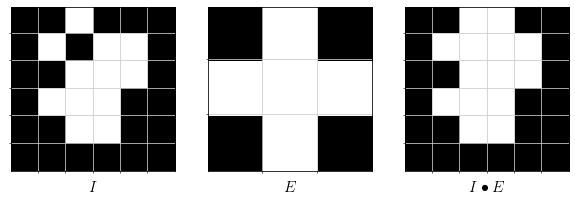

In [4]:
# Toy image
I = np.array([ \
    [0, 0, 1, 0, 0, 0], \
    [0, 1, 0, 1, 1, 0], \
    [0, 0, 1, 1, 1, 0], \
    [0, 1, 1, 1, 0, 0], \
    [0, 0, 1, 1, 0, 0], \
    [0, 0, 0, 0, 0, 0] ])

# Structuring element
E = np.array([ \
    [0, 1, 0], \
    [1, 1, 1], \
    [0, 1, 0] ])

# Dilation
fig = plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
display(I, "$I$")
plt.subplot(1,3,2)
display(E, "$E$")
plt.subplot(1,3,3)
display(mo.binary_dilation(I,E), "$I \oplus E$")
glue("G:mm:dilation-toy", fig, display=False)

# Erosion
fig = plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
display(I, "$I$")
plt.subplot(1,3,2)
display(E, "$E$")
plt.subplot(1,3,3)
display(mo.binary_erosion(I,E), "$I \ominus E$")
glue("G:mm:erosion-toy", fig, display=False)

# Opening
fig = plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
display(I, "$I$")
plt.subplot(1,3,2)
display(E, "$E$")
plt.subplot(1,3,3)
display(mo.binary_opening(I,E), "$I \circ E$")
glue("G:mm:opening-toy", fig, display=False)

# Closing
fig = plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
display(I, "$I$")
plt.subplot(1,3,2)
display(E, "$E$")
plt.subplot(1,3,3)
display(mo.binary_closing(I,E), r"$I \bullet E$")
glue("G:mm:closing-toy", fig, display=False)

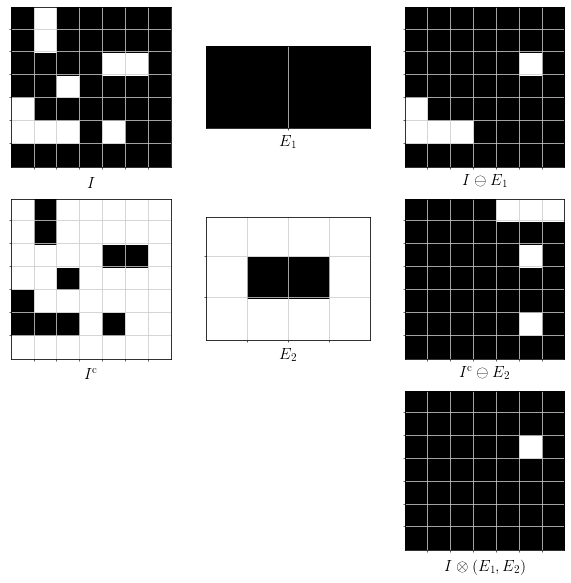

In [5]:
# Toy image
I = np.array([ \
    [0, 1, 0, 0, 0, 0, 0], \
    [0, 1, 0, 0, 0, 0, 0], \
    [0, 0, 0, 0, 1, 1, 0], \
    [0, 0, 1, 0, 0, 0, 0], \
    [1, 0, 0, 0, 0, 0, 0], \
    [1, 1, 1, 0, 1, 0, 0], \
    [0, 0, 0, 0, 0, 0, 0] ])
Ic = 1 - I

# Structuring element 1
E1 = np.array([[1, 1]])

# Structuring element 2
E2 = np.array([ \
    [1, 1, 1, 1],
    [1, 0, 0, 1], \
    [1, 1, 1, 1] ])

fig = plt.figure(figsize=(10,10))

# Erosion
plt.subplot(3,3,1)
display(I, "$I$")
plt.subplot(3,3,2)
display(E1, "$E_1$")
plt.subplot(3,3,3)
display(mo.binary_erosion(I,E1), "$I \ominus E_1$")

# Erosion of the complement
plt.subplot(3,3,4)
display(Ic, "$I^\mathrm{c}$")
plt.subplot(3,3,5)
display(E2, "$E_2$")
plt.subplot(3,3,6)
display(mo.binary_erosion(Ic,E2), "$I^\mathrm{c} \ominus E_2$")

# Hit-or-miss
# I1 = mo.binary_erosion(I,E1)
# I2 = mo.binary_erosion(Ic,E2)
# U = np.bitwise_and(I1,I2)
# plt.subplot(3,3,8)
# display(U, "")
plt.subplot(3,3,9)
display(smo.binary_hit_or_miss(I,E1, E2), r"$I \otimes (E_1,E_2)$")

# glue("G:mm:hit-or-miss-toy", fig, display=False)

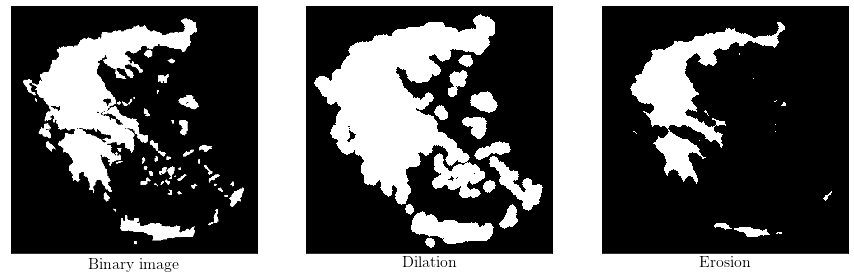

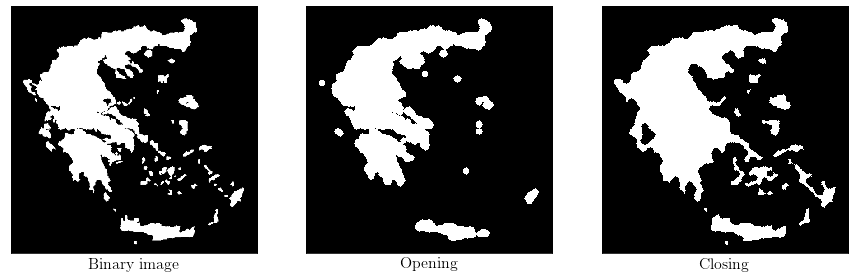

In [6]:
# Real image ans structuring element
img = io.imread("figs/greece.png")
se = mo.disk(4)

# Dilation & erosion
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
display(img, "Binary image", grid=False)
plt.subplot(1,3,2)
display(mo.binary_dilation(img,se), "Dilation", grid=False)
plt.subplot(1,3,3)
display(mo.binary_erosion(img,se), "Erosion", grid=False)
glue("G:mm:real-dilation-erosion", fig, display=False)

# Opening & closing
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
display(img, "Binary image", grid=False)
plt.subplot(1,3,2)
display(mo.binary_opening(img,se), "Opening", grid=False)
plt.subplot(1,3,3)
display(mo.binary_closing(img,se), "Closing", grid=False)
glue("G:mm:real-opening-closing", fig, display=False)

### Dilation

Having an image $I$ and a structuring element $E$, the dilation of $I$ by $E$ is noted $I \oplus E$.
The result of the dilation is obtained by moving the origin of the structuring element onto the white pixels of the image
and keeping the set of pixels of each displaced structuring element.

Mathematically speaking:

$$
  I \oplus E = \{ E_x \mid x \in I \}
$$

```{glue:figure} G:mm:dilation-toy
:name: "F:mm:dilation-toy"

Example of dilation on a small image $I$ by the structuring element $E$ (with the origin at the centre).
```

Question: how could you express the dilation as a convolution?

```{toggle}
You cannot.
The dilation is a binary operation and is not linear.
Therefore, it cannot be expressed as convolution which is a linear mathematical operator!
```

**Associativity** &nbsp;
The application of two consecutive dilations can be done in any order:

$$
  (I \oplus  E_1 ) \oplus  E_2 = (I \oplus  E_2) \oplus  E_1 = I \oplus  (E_1 \oplus E_2)
$$

**Monotony** &nbsp;
Dilation is a monotonous operation,
that is to say, that the relations of inclusions are conserved:

$$
  I_1 \subseteq I_2  \;\Rightarrow\;  I_1 \oplus E \subseteq I_2 \oplus E
$$

### Erosion

The erosion of $I$ by $E$ is noted $I \ominus E$.
The result of the erosion is obtained by moving the structuring element into the white pixels of the image
and keeping only the origin of each displaced structuring element.

Mathematically speaking:

$$
  I \ominus E = \{ x \mid E_x \subseteq I\}
$$

```{glue:figure} G:mm:erosion-toy
:name: "F:mm:erosion-toy"

Example of erosion on a small image $I$ by the structuring element $E$ (with the origin at the centre).
```

Erosion has similar properties as dilation as stated below.

**Associativity** &nbsp;
The application of two consecutive erosions can be done in any order:

$$
  (I \ominus E_1 ) \ominus E_2 = (I \ominus E_2) \ominus E_1 = I \ominus (E_1 \oplus E_2)
$$

**Monotony** &nbsp;
Erosion is a monotonous operation:

$$
  I_1 \subseteq I_2  \;\Rightarrow\;  I_1 \ominus E \subseteq I_2 \ominus E
$$

In addition to this, dilation and erosion are dual operators.
Considering the background as the object and the object as background
(_i.e._ by working with the complement of the image),
the dilation is converted to erosion and vice versa:

$$
  I^\mathrm{c} \ominus E = (I \oplus E)^\mathrm{c} \\
  I^\mathrm{c} \oplus E = (I \ominus E)^\mathrm{c}
$$

### Comparison

{numref}`F:mm:real-dilation-erosion` shows the result of dilation and erosion on a binary image of Greece.

As you can see, dilation:
* increase the size of objects (_e.g._ the islands are bigger),
* fill the small holes (_e.g._ the [Gulf of Corinth](https://en.wikipedia.org/wiki/Gulf_of_Corinth) does not more exist after dilation),
* welds close objects (_e.g._ some islands are grouped into a larger island).

On the contrary, erosion:
* decreases the size of objects (_e.g._ Crete is smaller),
* widens the holes (_e.g._ the Gulf of Corinth is bigger after erosion),
* separates the connected objects by a small bridge (_e.g._ the Peloponnese and mainland Greece are now disconnected),
* remove small items (_e.g._ small islands have disappeared).

```{glue:figure} G:mm:real-dilation-erosion
:name: "F:mm:real-dilation-erosion"

Dilation and erosion on a map of Greece (of size 300×300) by a disk of radius 4.
```

## Composition of basic operators

### Opening

Opening consists of an erosion followed by a dilation.
The erosion removes small objects but also decreases the size of bigger objects.
To avoid this, the result is dilated with the same structuring element.

$$
  I \circ E = (I \ominus E) \oplus E
$$

```{glue:figure} G:mm:opening-toy
:name: "F:mm:opening-toy"

Example of an opening on a small image $I$ by the structuring element $E$ (with the origin at the centre).
```

**Idempotence** &nbsp;
Opening is an idempotent operation, that is to say, applying twice the same opening gives the same result as only one opening:

$$
  (I \circ E) \circ E = I \circ E
$$

### Closing

Contrary to opening, closing is firstly a dilation, then an erosion.
Indeed, expansion closes holes but enlarges objects.
To avoid the widening of the objects, an erosion can be applied with the same structuring element.

$$
  I \bullet E = (I \oplus E) \ominus E
$$

```{glue:figure} G:mm:closing-toy
:name: "F:mm:closing-toy"

Example of closing on a small image $I$ by the structuring element $E$ (with yhe origin at the centre).
```

**Idempotence** &nbsp;
Similarly to opening, closing is an idempotent operation:

$$
  (I \bullet E) \bullet E = I \bullet E
$$

### Comparison


{numref}`F:mm:real-opening-closing` shows the result of an opening and a closing on a binary image of Greece.

```{glue:figure} G:mm:real-opening-closing
:name: "F:mm:real-opening-closing"

Opening and closing on a map of Greece (of size 300×300) by a disk of radius 4.
```

Even if the objects are slightly distorted, they conserve their respective size.

Especially, opening:
* removes small objects (_e.g._ small islands have disappeared),
* smooth the contours (the coasts are no more jagged).

Besides, closing:
* fill small holes (_e.g._ gulfs and lakes are removed)
* weld close shapes (_e.g._ some separated islands now form only one)

### Hit-or-miss transform

The hit-or-miss transform is able to detect objects of a particular shape.
It is the intersection of the two sets given by:
* the erosion by a first structuring element $E_1$: $I \ominus E_1$,
* and the erosion of the background by a second structuring element $E_2$: $I^\mathrm{c} \ominus E_2$

with $E_1 \cap E_2 = \emptyset$ (the structuring elements are disjointed).

$$
   I \otimes (E_1, E_2)
   &= (I \ominus E_1) \cap (I^\mathrm{c} \ominus E_2) \\
   &= (I \ominus E_1) \cap (I \oplus E_2)^\mathrm{c}
$$

```{figure} figs/hit-or-miss.png
---
height: 472px
name: F:mm:hit-or-miss
---
Example of a hit-or-miss transform applied on image $I$ by the structuring elements $E_1$ and $E_2$.
The origins of the structuring elements are marked by a dot.
```

Sometimes, the two structuring elements are combined into a single structuring element whose pixels have the following values:
* $1$: pixels that belong to the object to detect,
* $-1$: pixels that do not belong to the object to detect (_i.e_ pixels of the background),
* $0$: unused pixels (also called "don't care pixels").

With this notation, the structuring element of the hit-or-miss transform in {numref}`F:mm:hit-or-miss` writes

$$
  (E_1, E_2) =
  \begin{bmatrix}
    -1 & -1 & -1 & -1 \\
    -1 &  1 &  1 & -1 \\
    -1 & -1 & -1 & -1
  \end{bmatrix}
$$